# Milestone 3

# LOAD THE DATASET 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/eye-diseases-classification/dataset/glaucoma/1255_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1482_left.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_398_8823411.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_309_4110303.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_13_697490.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_205_310538.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/Glaucoma_040.png
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1256_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_221_3079640.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_392_9636183.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_12_5295071.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_399_7128170.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_113_8738972.jpg
/kaggle/input/eye-disea

# IMPORTING THE  PACKAGES

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

#### **Preprocessing Of Images**

In [4]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
#     print(l1)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

#### **Visualization of images**

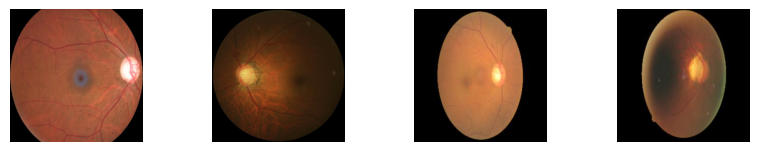

In [5]:
data,result = load_images("/kaggle/input/eye-diseases-classification/dataset/")

In [6]:
data

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

**preprocessing class label**

In [9]:
t = pd.Series(result,dtype='category').cat.codes

In [10]:
t

0       2
1       2
2       2
3       2
4       2
       ..
4212    0
4213    0
4214    0
4215    0
4216    0
Length: 4217, dtype: int8

#### **Preprocess the images such as noise reduction,image enhancement etc.**

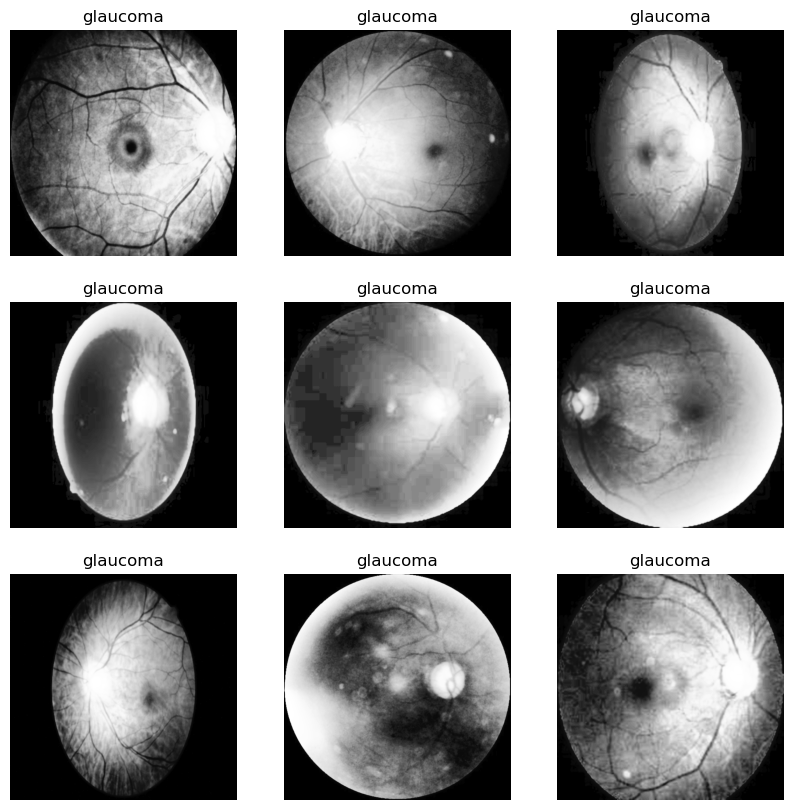

In [7]:
data_dir = '/kaggle/input/eye-diseases-classification/dataset/'

def preprocess_image(image):
    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Noise Reduction using Gaussian Blur
    image = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Image Enhancement using Histogram Equalization
    image = cv2.equalizeHist(image)
    
    # Normalization to the range [0, 1]
    image = image / 255.0
    
    return image

def load_and_preprocess_images(data_dir):
    images = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for file in os.listdir(category_path):
                if file.endswith('.jpg') or file.endswith('.png'):
                    image_path = os.path.join(category_path, file)
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (512, 512))
                    image = preprocess_image(image)
                    images.append(image)
                    labels.append(category)
    return np.array(images), np.array(labels)

# Load and preprocess the images
images, labels = load_and_preprocess_images(data_dir)

# Display some preprocessed images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

# **IMAGE SEGMENTATION**

**It is a three-channel image (RGB). We need to convert it into grayscale so that we have only a single channel.**

In [15]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

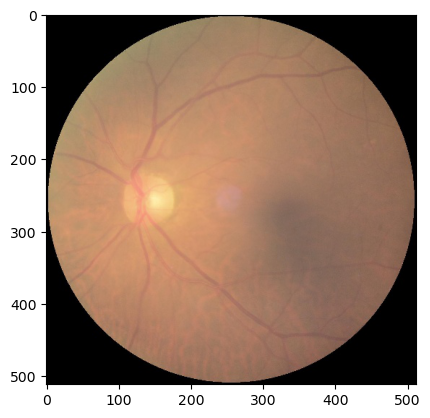

In [16]:
image = plt.imread('/kaggle/input/eye-diseases-classification/dataset/cataract/1102_left.jpg')
image.shape
plt.imshow(image)

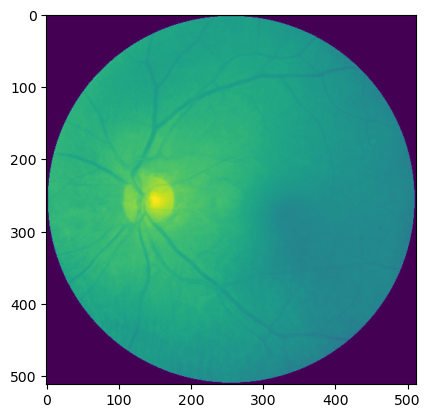

In [17]:
gray = rgb2gray(image)
plt.imshow(gray)

**We can define multiple thresholds as well to detect multiple objects**

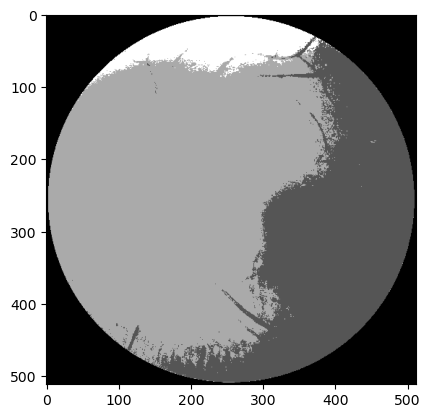

In [18]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

In [19]:
gray.shape

(512, 512)

# **DATA PREPROCESSING AND MODEL TRAINING**

#### **SPLITING OF THE DATA**

In [11]:
x_train , x_test , y_train , y_test = train_test_split(data ,t , test_size = 0.10 , shuffle = True , random_state = 10)

In [12]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (3795, 256, 256, 3)
x_test Shape :  (422, 256, 256, 3)
y_train Shape:  (3795,)
y_test Shape:  (422,)


In [13]:
import tensorflow.keras as K

In [14]:
input_v = K.Input(shape=(256,256,3))

#### **MODEL TRAINING**

In [21]:
modelVGG = VGG16(include_top = False,weights ='/kaggle/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop (1).h5',input_tensor = input_v)

In [22]:
for layer in modelVGG.layers:
    layer.trainable = False


In [23]:
num_classes = 4
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(4096,activation='relu')(top_model)
        top_model = Dropout(0.625, name='dropout_1')(top_model)
#         top_model = Dense(1024,activation='relu')(top_model)
#         top_model = Dropout(0.625, name='dropout_2')(top_model)
        top_model = Dense(4096,activation='relu')(top_model)
        top_model = Dense(4,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [24]:
num_classes = 4
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

#### **COMPILING OF THE MODEL**

In [26]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

#### **MODEL TRAINING**

In [27]:
history = model.fit(x_train , y_train , epochs = 8, validation_data = (x_test , y_test), verbose = 1)

Epoch 1/8
119/119 [==============================] - 1592s 13s/step - loss: 1.3930 - accuracy: 0.7181 - val_loss: 0.5377 - val_accuracy: 0.7962
Epoch 2/8
119/119 [==============================] - 1594s 13s/step - loss: 0.4836 - accuracy: 0.8129 - val_loss: 0.4751 - val_accuracy: 0.8057
Epoch 3/8
119/119 [==============================] - 1592s 13s/step - loss: 0.4164 - accuracy: 0.8406 - val_loss: 0.4636 - val_accuracy: 0.8175
Epoch 4/8
119/119 [==============================] - 1598s 13s/step - loss: 0.3772 - accuracy: 0.8538 - val_loss: 0.3873 - val_accuracy: 0.8649
Epoch 5/8
119/119 [==============================] - 1593s 13s/step - loss: 0.3724 - accuracy: 0.8509 - val_loss: 0.4797 - val_accuracy: 0.8412
Epoch 6/8
119/119 [==============================] - 1605s 13s/step - loss: 0.3610 - accuracy: 0.8564 - val_loss: 0.4107 - val_accuracy: 0.8578
Epoch 7/8
119/119 [==============================] - 1642s 14s/step - loss: 0.3380 - accuracy: 0.8690 - val_loss: 0.3861 - val_accuracy:

#### **MODEL EVALUATION**

In [28]:
loss,aac = model.evaluate(x_train,y_train)

119/119 [==============================] - 1420s 12s/step - loss: 0.3069 - accuracy: 0.8593


In [29]:
loss,aac = model.evaluate(x_test,y_test)

14/14 [==============================] - 155s 11s/step - loss: 0.4320 - accuracy: 0.8223


In [30]:
def names(number):
    if number==0:
        return "Cataract"
    elif number==1:
        return "diabetic_retinopathy"
    elif number==2:
        return "glaucoma"
    elif number==3:
        return "normal"

In [31]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((256,256)))
    x = x.reshape(1,256,256,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

91.88425540924072% Confidence Cataract


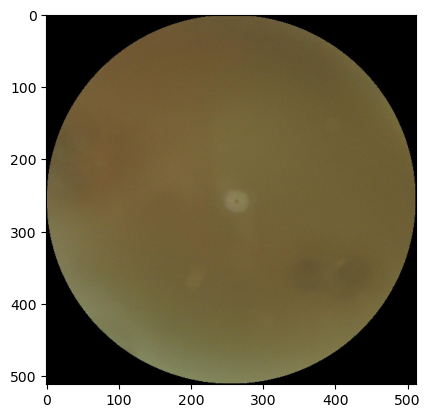

In [32]:
img = Image.open(r"/kaggle/input/eye-diseases-classification/dataset/cataract/0_left.jpg")
Prediction(img)

99.99504089355469% Confidence diabetic_retinopathy


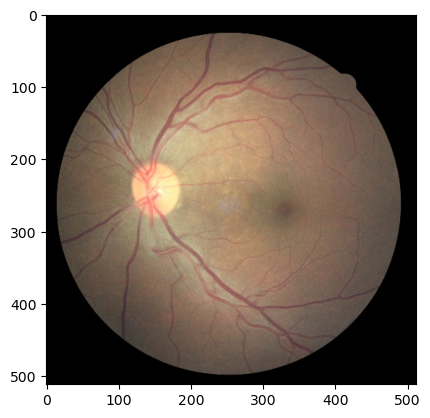

In [33]:
img = Image.open(r"/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy/10003_left.jpeg")
Prediction(img)

#### **SAVING THE  MODEL**

In [36]:
model.save('model.h5')